# Matrix Plots

Matrix plots allow you to plot data as color-encoded matrices and can also be used to indicate clusters within the data (later in the machine learning section we will learn how to formally cluster data).

Let's begin by exploring seaborn's heatmap and clutermap:

In [27]:
import seaborn as sns
%matplotlib inline

In [28]:
flights = sns.load_dataset('flights')

In [29]:
tips = sns.load_dataset('tips')

In [30]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [5]:
flights.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [31]:
flights['year'].unique()

array([1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959,
       1960])

In [32]:
flights['month'].unique()

[January, February, March, April, May, ..., August, September, October, November, December]
Length: 12
Categories (12, object): [January, February, March, April, ..., September, October, November, December]

In [33]:
flights.tail()

,year,month,passengers
139,1960,August,606
140,1960,September,508
141,1960,October,461
142,1960,November,390
143,1960,December,432


## Heatmap

In order for a heatmap to work properly, your data should already be in a matrix form, the sns.heatmap function basically just colors it in for you. For example:

In [34]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [35]:
import numpy as np

[[0.06134221 0.32759989 0.78716054 0.62682887 0.619418   0.10542491
  0.30928951 0.54583219 0.40541292 0.23791843 0.90948094 0.33113402
  0.31854896 0.9701234  0.53280205]
 [0.08889177 0.36212871 0.61642113 0.52979154 0.61360153 0.85276784
  0.36894035 0.65752476 0.40758302 0.71403304 0.68987854 0.94222075
  0.30273847 0.56768715 0.83094329]
 [0.46876884 0.42640897 0.38211792 0.58111856 0.43506723 0.37321331
  0.46350411 0.92237645 0.7607989  0.93742248 0.95640038 0.18353508
  0.4906881  0.28836332 0.33308983]
 [0.84262528 0.95668417 0.49861011 0.83367471 0.75093037 0.83869569
  0.81044343 0.51102678 0.48708744 0.10422365 0.49470331 0.51555069
  0.02208988 0.70811132 0.86230962]
 [0.28304721 0.65229579 0.94043239 0.91918617 0.227287   0.76977087
  0.10724614 0.30702709 0.46506165 0.38847254 0.6588543  0.34364005
  0.15607083 0.38477262 0.34810334]
 [0.53749384 0.56508671 0.35391005 0.72235861 0.25488444 0.17088643
  0.07900916 0.32378804 0.74084731 0.84498411 0.19294856 0.86878161
  0.

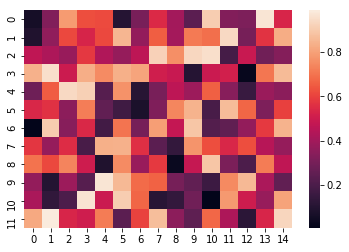

In [10]:
new  = np.random.rand(12,15)
print(new)
print(new.shape)
sns.heatmap(new)

<h3>.corr() is used to find the pairwise correlation of all columns in the dataframe. Any na values are automatically excluded. For any non-numeric data type columns in the dataframe it is ignored. </h3>


In [41]:
# Matrix form for correlation data
tips.corr(method='pearson')

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


Method of correlation:

pearson : standard correlation coefficient

kendall : Kendall Tau correlation coefficient

spearman : Spearman rank correlation

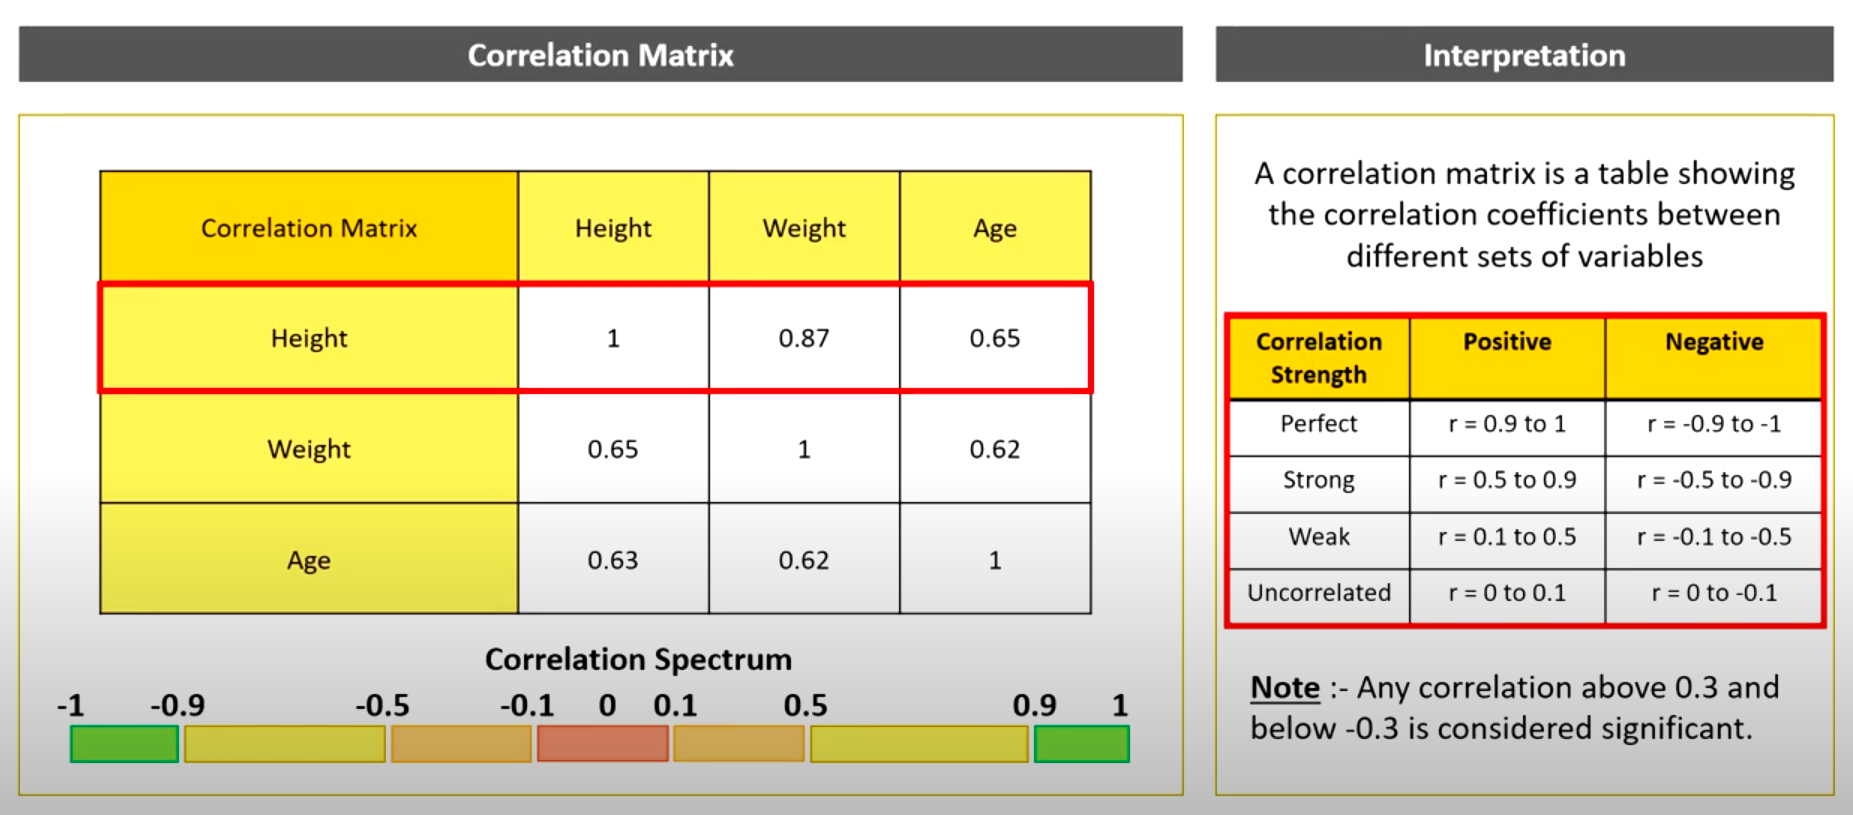

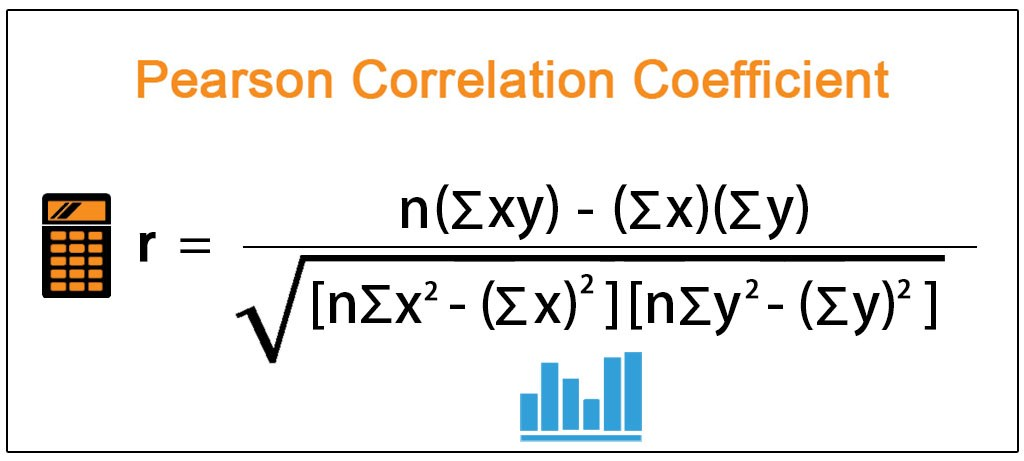

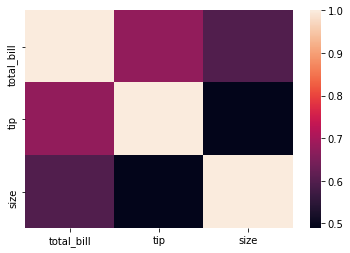

In [42]:
sns.heatmap(tips.corr())

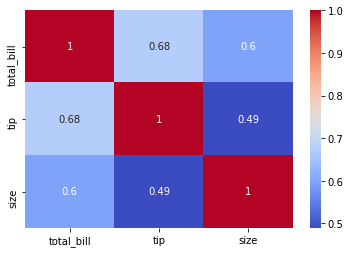

In [13]:
sns.heatmap(tips.corr(),cmap='coolwarm',annot=True)

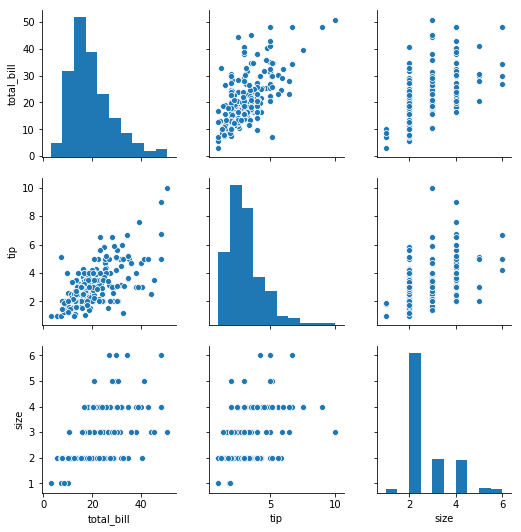

In [43]:
sns.pairplot(tips)

Or for the flights data:

In [46]:
flights.head()
print(flights.shape)

(144, 3)


In [48]:
#EXPLORE pivot and pivot_table
x = flights.pivot(index='year',columns='month')
x
#print(x.shape)

passengers                                                               \
month    January February March April  May June July August September October   
year                                                                            
1949         112      118   132   129  121  135  148    148       136     119   
1950         115      126   141   135  125  149  170    170       158     133   
1951         145      150   178   163  172  178  199    199       184     162   
1952         171      180   193   181  183  218  230    242       209     191   
1953         196      196   236   235  229  243  264    272       237     211   
1954         204      188   235   227  234  264  302    293       259     229   
1955         242      233   267   269  270  315  364    347       312     274   
1956         284      277   317   313  318  374  413    405       355     306   
1957         315      301   356   348  355  422  465    467       404     347   
1958         340      318   362   348  363  435  491    505       404     359   
1959         360      342   406   396  420  472  548    559       463     407   
1960         417      391   419   461  472  535  622    606       508     461   

                         
month November December  
year                     
1949       104      118  
1950       114      140  
1951       146      166  
1952       172      194  
1953       180      201  
1954       203      229  
1955       237      278  
1956       271      306  
1957       305      336  
1958       310      337  
1959       362      405  
1960       390      432

In [50]:
#y = tips.pivot(index='sex',columns='total_bill')
#y

In [51]:
flights.pivot_table(values='passengers',index='month',columns='year')

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
June,135,149,178,218,243,264,315,374,422,435,472,535
July,148,170,199,230,264,302,364,413,465,491,548,622
August,148,170,199,242,272,293,347,405,467,505,559,606
September,136,158,184,209,237,259,312,355,404,404,463,508


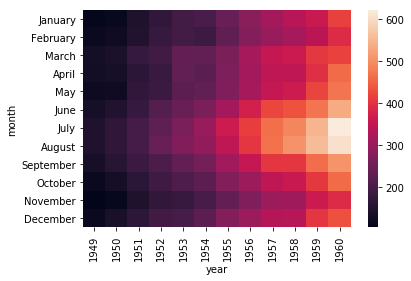

In [52]:
pvflights = flights.pivot_table(values='passengers',index='month',columns='year')
sns.heatmap(pvflights)

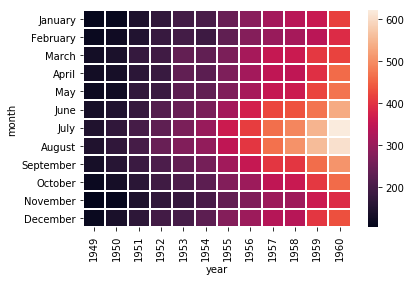

In [19]:
sns.heatmap(pvflights,linecolor='white',linewidths=1)

## clustermap

The clustermap uses hierarchal clustering to produce a clustered version of the heatmap. For example:

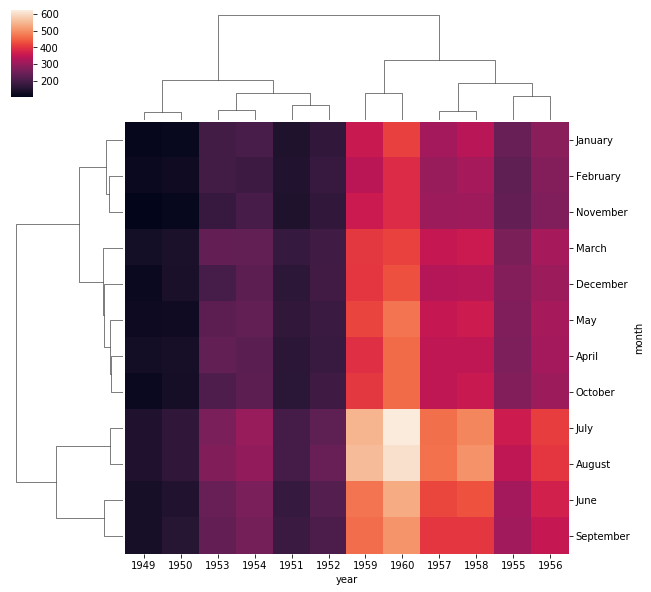

In [53]:
sns.clustermap(pvflights)

Notice now how the years and months are no longer in order, instead they are grouped by similarity in value (passenger count). That means we can begin to infer things from this plot, such as August and July being similar (makes sense, since they are both summer travel months)

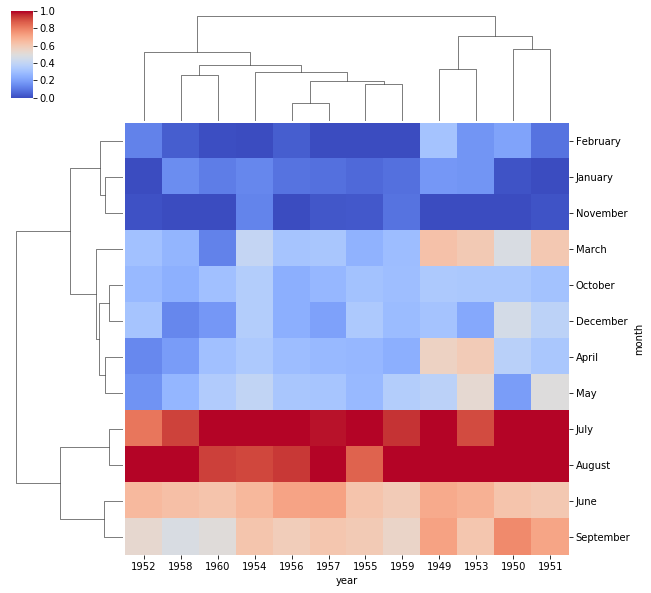

In [54]:
# More options to get the information a little clearer like normalization
sns.clustermap(pvflights,cmap='coolwarm',standard_scale=1)